STEP 01:IMPORT ALL DATA SET


---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression




In [ ]:
tips_dataset=pd.read_csv('/content/tips.csv')

In [ ]:
tips_dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips_dataset.shape


(244, 7)

In [ ]:
tips_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
tips_dataset.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [ ]:
print(tips_dataset.tip.value_counts())
print(tips_dataset.smoker.value_counts())
print(tips_dataset.day.value_counts())
print(tips_dataset.sex.value_counts())
print(tips_dataset.time.value_counts())

tip
2.00    33
3.00    23
4.00    12
5.00    10
2.50    10
        ..
4.34     1
1.56     1
5.20     1
2.60     1
1.75     1
Name: count, Length: 123, dtype: int64
smoker
1    151
0     93
Name: count, dtype: int64
day
2    87
3    76
0    62
1    19
Name: count, dtype: int64
sex
0    157
1     87
Name: count, dtype: int64
time
1    176
0     68
Name: count, dtype: int64


In [ ]:
tips_dataset.replace({'smoker':{'No':1,'Yes':0}},inplace=True)
tips_dataset.replace({'time':{'Dinner':1,'Lunch':0}},inplace=True)
tips_dataset.replace({'day':{'Thur':0,'Fri':1,'Sat':2,'Sun':3}},inplace=True)
tips_dataset.replace({'sex':{'Female':1,'Male':0}},inplace=True)

In [ ]:
tips_dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,1,3,1,2
1,10.34,1.66,0,1,3,1,3
2,21.01,3.50,0,1,3,1,3
3,23.68,3.31,0,1,3,1,2
4,24.59,3.61,1,1,3,1,4


**STEP 02 :Splitting data into train and test data**

In [ ]:
X=tips_dataset[['tip']]
Y=tips_dataset['total_bill']

In [ ]:
print(X)

      tip
0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
..    ...
239  5.92
240  2.00
241  2.00
242  1.75
243  3.00

[244 rows x 1 columns]


In [ ]:
print(Y)

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64


**Step 03: Linear regression model**

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split (X,Y, test_size=0.2,random_state=0 )

In [ ]:
lin_reg_model=LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

**Step 04: Plotting**

Text(0, 0.5, 'Total Bill')

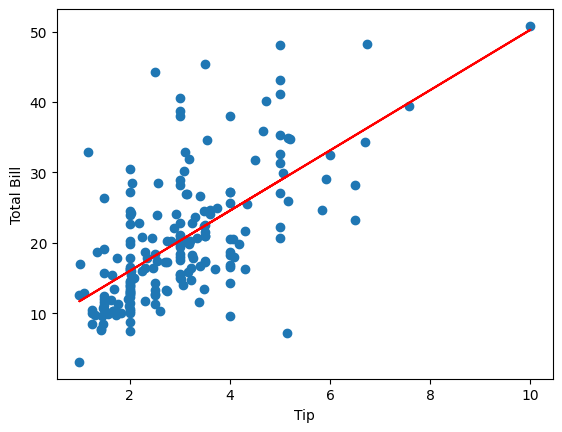

In [ ]:
from sklearn.model_selection import train_test_split
plt.scatter(X_train, Y_train)
plt.plot(X_train,lin_reg_model.predict(X_train), color= "red")
plt.xlabel("Tip")
plt.ylabel("Total Bill")

Text(0, 0.5, 'Total Bill')

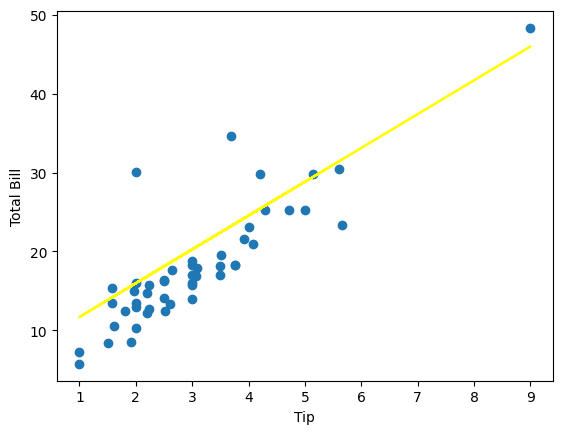

In [ ]:
plt.scatter(X_test, Y_test)
plt.plot(X_test,lin_reg_model.predict(X_test), color= "yellow")
plt.xlabel("Tip")
plt.ylabel("Total Bill")

**Step 05 : Model testing**

In [ ]:
print("Score for testing Model:",lin_reg_model.score(X_test , Y_test))

Score for testing Model: 0.6410241739215915


In [ ]:
print("Score for training Model:",lin_reg_model .score(X_train , Y_train))

Score for training Model: 0.415009650645766


**Step 06 : Unknown values prediction**

In [ ]:
lin_reg_model.predict([[7]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37.40369159])

In [ ]:
lin_reg_model.predict(X_test)

array([18.7214148 , 23.52053177, 22.44930031, 11.69413637, 18.12152518,
       11.69413637, 20.60678218, 31.61904167, 22.40645105, 23.1777377 ,
       28.83383985, 25.79154249, 18.12152518, 15.97906224, 14.17939338,
       31.40479538, 13.83659931, 20.26398811, 20.26398811, 24.54891398,
       15.97906224, 24.89170805, 15.97906224, 15.80766521, 15.97906224,
       18.12152518, 16.83604742, 25.40589916, 27.59121135, 16.96459519,
       16.83604742, 18.2072237 , 14.13654412, 14.30794115, 20.26398811,
       18.59286702, 20.56393292, 15.97906224, 45.97354333, 20.26398811,
       15.63626817, 15.12207707, 20.26398811, 29.43372948, 16.96459519,
       22.40645105, 23.52053177, 24.20611991, 20.26398811])